# Using Multi-Layer Perception for recognizing hand-written digits

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

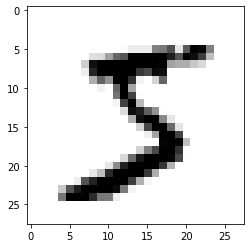

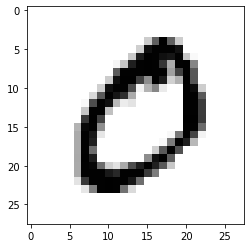

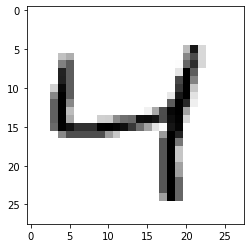

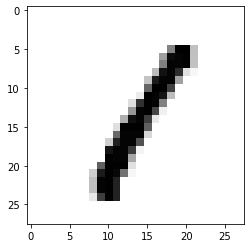

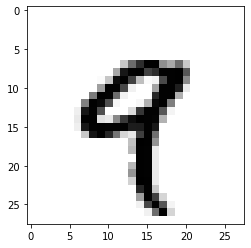

In [7]:
for idx in range(5):
    digit = train_images[idx]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()

### Define a simple MLP as a fully connected Sequential Neural network with a hidden layer with 512 nodes

In [8]:
# define a neural network
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [9]:
# compilation
network.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [10]:
# preparing the image data
train_images = train_images.reshape( (60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Train the network with a certain a batch size and epoch. 

***An epoch is one complete pass through the entire training dataset. The batch size is how many samples are used in each stocastic gradident descent*** 

In [11]:
# train
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 20s 6ms/step - loss: 0.4354 - accuracy: 0.8703
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1146 - accuracy: 0.9661
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0714 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0501 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0349 - accuracy: 0.9896


In [12]:
# evaluation
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9788
test_acc: 0.9787999987602234


In [13]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('train_acc:', train_acc)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0302 - accuracy: 0.9913
train_acc: 0.9913166761398315


### Making prediction on the test samples

In [14]:
idx = 1
idx = 99
test_labels[idx]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [15]:
test_images.shape

(10000, 784)

In [16]:
network.predict(test_images)[idx]

array([1.2778058e-11, 7.6980887e-15, 3.2249119e-09, 4.3306618e-06,
       2.7042049e-07, 8.4741290e-09, 1.8101849e-13, 6.9662491e-07,
       5.1273862e-08, 9.9999464e-01], dtype=float32)

In [17]:
orig_test_images = test_images.reshape((10000, 28, 28))

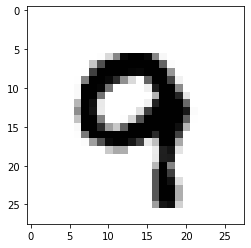

In [18]:
digit = orig_test_images[idx]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()